In [12]:
from ResNet34 import *
from query import *
from utils import set_seed
import torchvision

# REF: https://towardsdev.com/implement-resnet-with-pytorch-a9fb40a77448

In [13]:
set_seed(42)

Files already downloaded and verified
Files already downloaded and verified


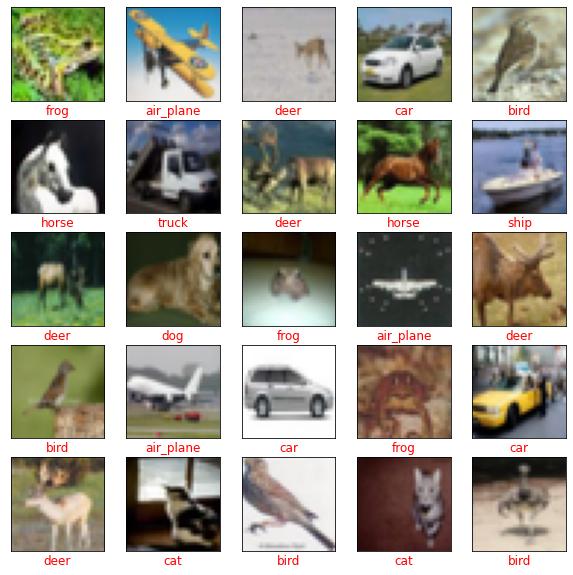

In [14]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(
    root='./cifar10', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=config['batch_size'], shuffle=True)

testset = torchvision.datasets.CIFAR10(
    root='./cifar10', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=config['batch_size'], shuffle=False)

class_names = ['air_plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# get some random training images
plt.figure(figsize=(10, 10))
counter = 0
for images, labels in trainloader:
    for i, img in enumerate(images):
        plt.subplot(5, 5, counter+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        img = img/2 + 0.5   # unmornalize
        # convert (C,H,W) to (H,W,C)
        img_show = np.transpose(img, (1, 2, 0))
        plt.imshow(img_show, cmap=plt.cm.binary)
        plt.xlabel(class_names[int(labels[i])], color='red', fontsize='large')
        counter += 1
        if counter == 25:
            break
    if counter == 25:
        break

plt.show()


# Train a pseudo victim Model

In [ ]:
victim = ResNet34(3, ResBlock, outputs=10)
victim_loss = torch.nn.CrossEntropyLoss()

victim_result = Training(victim, trainloader, testloader, (-1, 3, 32, 32), config["epochs"], optimizer=torch.optim.Adam(
    victim.parameters(), lr=config["learning_rate"]), loss=victim_loss)

In [9]:
# save model inference
torch.save(victim.state_dict(), 'victim_resnet34')

In [ ]:
# visualization
plots(victim_result, 'ResNet34-Victim')

# Load Victim from File

In [ ]:
victim = ResNet34(3, ResBlock, outputs=10)
victim.load_state_dict(torch.load('victim_resnet34'))
victim.eval()

# Query Victim Model

In [14]:
queryloader = QueryVictim(victim, trainloader, config["query_size"], sampling='random')

# Train Attacker Model on queried data

In [7]:
attacker = ResNet34(3, ResBlock, outputs=10)
attacker_loss = torch.nn.CrossEntropyLoss()

In [ ]:
attacker_result = Training(attacker, queryloader, testloader, (-1, 3, 32, 32), config["epochs"], optimizer=torch.optim.Adam(
    attacker.parameters(), lr=config["learning_rate"]), loss=attacker_loss)

In [ ]:
plots(attacker_result, 'ResNet34-Attacker')

# Random

In [16]:
def Randing(dataloader, query_count):
  xList = []
  dataset = dataloader.dataset
  for i in range(query_count):
    ind = np.random.randint(0, high=len(dataset))
    rand_sample = dataset[ind]
#  dataloader = torch.utils.data.RandomSampler(dataset, replacement=False, num_samples=n_samples, generator=torch.Generator(device=config['device']))
# dataloader = torch.utils.data.distributed.DistributedSampler(dataset

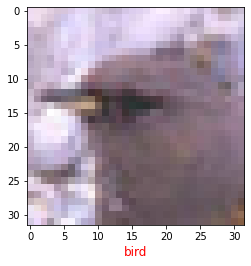

In [11]:
# Recovers the original `dataset` from the `dataloader`
dataset = trainloader.dataset
n_samples = len(dataset)

# Get a random sample
random_index = int(np.random.random()*n_samples)
single_example = dataset[random_index]
image, label = single_example
img = image/2 + 0.5   # unmornalize
# convert (C,H,W) to (H,W,C)
img_show = np.transpose(img, (1, 2, 0))
class_names = ['air_plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.imshow(img_show, cmap=plt.cm.binary)
plt.xlabel(class_names[int(label)], color='red', fontsize='large')
plt.show()

In [12]:
img = image.to(torch.device(config['device']))
label = victim(img)
plt.imshow(img_show, cmap=plt.cm.binary)
plt.xlabel(class_names[int(label)], color='red', fontsize='large')
plt.show()

NameError: ignored